# Hierarchical clustering in Python

In this notebook, I implement clustering technique, which is **Agglomerative Hierarchical Clustering**. 

**Note:** Recalling that agglomerative is the bottom up approach. 

- Agglomerative clustering, which is more popular than **Divisive clustering**. 

- Complete Linkage is used as the Linkage Criteria.

- The average linkage is also used to see the difference.

### Generating random data

<hr>

I generate a set of data using the <b>make_blobs</b> class. <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X1</b> and <b>y1</b>.

<hr>
<h3 id="agglomerative_clustering">Agglomerative Clustering</h3>

I start by clustering the random data points created earlier.

The <b> Agglomerative Clustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Let's save the result to a variable called <b> agglom </b>

<h3 id="dendrogram">Dendrogram Associated for the Agglomerative Hierarchical Clustering</h3>

Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. 
<br>

Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X2 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br>

<br>
Recall that the distance values are symmetric, with a diagonal of 0's. <br> 

In [1]:
#packages
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [3]:
#generating the random data
X1,y1 = make_blobs(n_samples = 50,
                   centers=[[4,4], [-2, -1], [1, 1], [10,4]], 
                   cluster_std=0.9)

In [5]:
X1.shape, y1.shape

((50, 2), (50,))

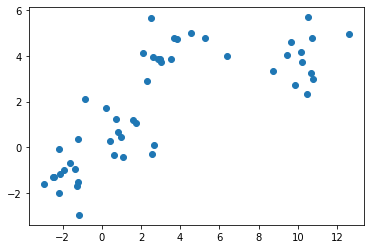

In [6]:
#plotting the scatter plot of the data
plt.scatter(X1[:,0], X1[:,1], marker = 'o')

In [17]:
#clustering algorithm with complete linkage
agglom = AgglomerativeClustering(n_clusters = 4, 
                                 linkage = 'complete')

In [32]:
#fitting the model
agglom_fit = agglom.fit(X1, y1)

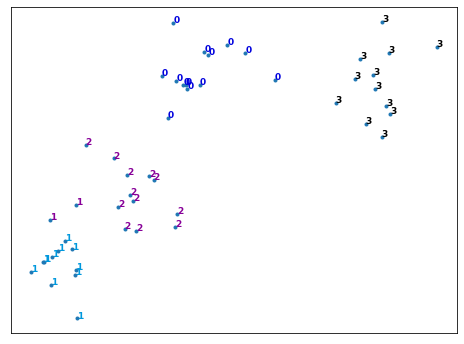

In [33]:
#plotting the clustering
plt.figure(figsize = (8,6))

"""We now scale the data points down, or else the data will be 
scattered too far apart.

We create a minimum and maximum range of X1.

"""
x_min, x_max = np.min(X1, axis = 0), np.max(X1, axis = 0)

"""Get the average distance for X1.

"""
X1 = (X1 - x_min) / (x_max - x_min)

"""Construct a loop for all the data points.

"""
for i in range(X1.shape[0]):
    """replace the data points with respective cluster value
    (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    
    """
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color = plt.cm.nipy_spectral(agglom.labels_[i]/ 10.),
             fontdict = {'weight': 'bold', 'size': 9})

    
"""Removing the x ticks, yticks, x and y axis.

"""
plt.xticks([])
plt.yticks([])
plt.axis('on')    

"""Display the plot of the original data before clustering

"""
plt.scatter(X1[:,0], X1[:,1], marker = '.')
plt.show()

In [46]:
#the distance matrix with scipy
from scipy.spatial import distance
distance_1 = distance.cdist(X1, X1, 'euclidean')
distance_1

array([[0.        , 0.57295062, 0.19335389, ..., 0.92610811, 1.17705714,
        0.70537931],
       [0.57295062, 0.        , 0.38427842, ..., 0.42768226, 0.81573437,
        0.23932597],
       [0.19335389, 0.38427842, 0.        , ..., 0.73559531, 1.01169835,
        0.51444193],
       ...,
       [0.92610811, 0.42768226, 0.73559531, ..., 0.        , 0.43995082,
        0.22119825],
       [1.17705714, 0.81573437, 1.01169835, ..., 0.43995082, 0.        ,
        0.57643171],
       [0.70537931, 0.23932597, 0.51444193, ..., 0.22119825, 0.57643171,
        0.        ]])

In [47]:
"""Using the linkage class from the hierarchy, pass the parameters:

-The distance matrix
-The 'complete' for complete linkage

"""
Z = hierarchy.linkage(distance_1, 'complete')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


- A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. 
 
- Each merge is represented by a horizontal line. 
 
- The y-coordinate of the  horizontal line is the similarity of the two clusters that  were merged, where cities are viewed as singleton clusters. 

- By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 

- Next, I save the dendrogram to a variable called **dendro**. 

- In doing so, the dendrogram will also be displayed.

- Using the dendrogram class from hierarchy, pass in the parameter: Z

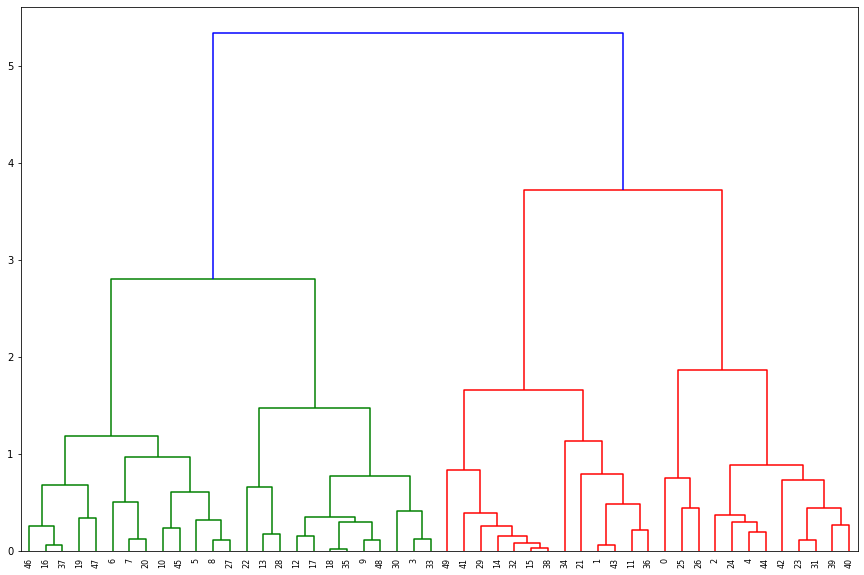

In [50]:

plt.figure(figsize = (15, 10))
dendro = hierarchy.dendrogram(Z)

In [57]:
#using average linkage
#the previously defined variables are unchanged

agglom1 = AgglomerativeClustering(n_clusters = 4, 
                                 linkage = 'average')

#fitting the model
agglom_fit = agglom1.fit(X1, y1)

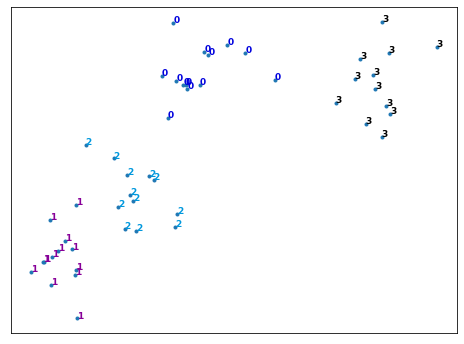

In [56]:
#plotting the clustering
plt.figure(figsize = (8,6))
x_min, x_max = np.min(X1, axis = 0), np.max(X1, axis = 0)
X1 = (X1 - x_min) / (x_max - x_min)
for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color = plt.cm.nipy_spectral(agglom1.labels_[i]/ 10.),
             fontdict = {'weight': 'bold', 'size': 9})
    
plt.xticks([])
plt.yticks([])
plt.axis('on')    
plt.scatter(X1[:,0], X1[:,1], marker = '.')
plt.show()

In [106]:
X1.shape[0]

50

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


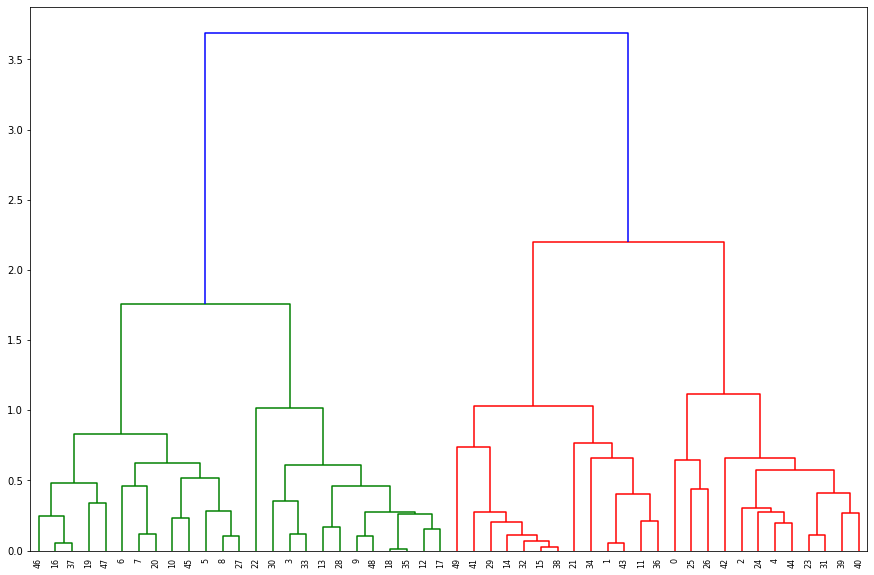

In [70]:
#the distance matrix with scipy
from scipy.spatial import distance
distance_2 = distance.cdist(X1, X1, 'euclidean')
distance_2

Z1 = hierarchy.linkage(distance_2, 'average')
plt.figure(figsize = (15, 10))
dendro1 = hierarchy.dendrogram(Z1)

## Clustering on Vehicle dataset

**Problem set:** 

- Consider the case an automobile manufacturer has developed prototypes for a new vehicle. 

- Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes, that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

- The objective here, is to use **clustering methods**, to find the **most distinctive clusters of vehicles**. 

- This will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

In [59]:
#loading the data
pdf = pd.read_csv("cars_clus.csv")
pdf

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864,0.0
155,Volvo,C70,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251,0.0
156,Volvo,S80,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943,0.0
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0


In [129]:
#data cleaning
"""lets simply clear the dataset by dropping the rows that 
have null value:

"""
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf

Shape of dataset before cleaning:  1989
Shape of dataset after cleaning:  1989


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,0.0,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0.0,1
113,Volkswagen,Jetta,83.721,13.240,0.0,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0.0,1
114,Volkswagen,Passat,51.102,16.725,0.0,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0.0,1
115,Volkswagen,Cabrio,9.569,16.575,0.0,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0.0,1


In [108]:
#feature selection
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 
                  'width', 'length', 'curb_wgt', 'fuel_cap', 
                  'mpg']]

In [128]:
#normalisation
"""Now we can normalize the feature set. 

MinMaxScaler transforms features by scaling each 
feature to a given range. It is by default (0, 1). 

That is, this estimator scales and translates each feature 
individually such that it is between zero and one.

"""
from sklearn.preprocessing import MinMaxScaler
x = featureset.values 
min_max_scaler = MinMaxScaler()
feature_norm = min_max_scaler.fit_transform(x)
feature_norm[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [112]:
#clustering using scipy
import scipy
leng = feature_norm.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_norm[i],
                                                  feature_norm[j])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  after removing the cwd from sys.path.


**Note:** In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. 

The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:

 - single
 - complete
 - average
 - weighted
 - centroid
    
I use __complete__ for this case, but as said earlier, it is perfectly possible to change the clustering methods to see how the results are altered.

In [119]:
import pylab
import scipy.cluster.hierarchy
Z_cluster = hierarchy.linkage(D, 'centroid')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


- Essentially, Hierarchical clustering does not require a pre-specified number of clusters. 

- However, in some applications we want a partition of disjoint clusters just as in flat clustering.

- So one can use a cutting line:

In [120]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z_cluster, max_d, criterion = 'distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

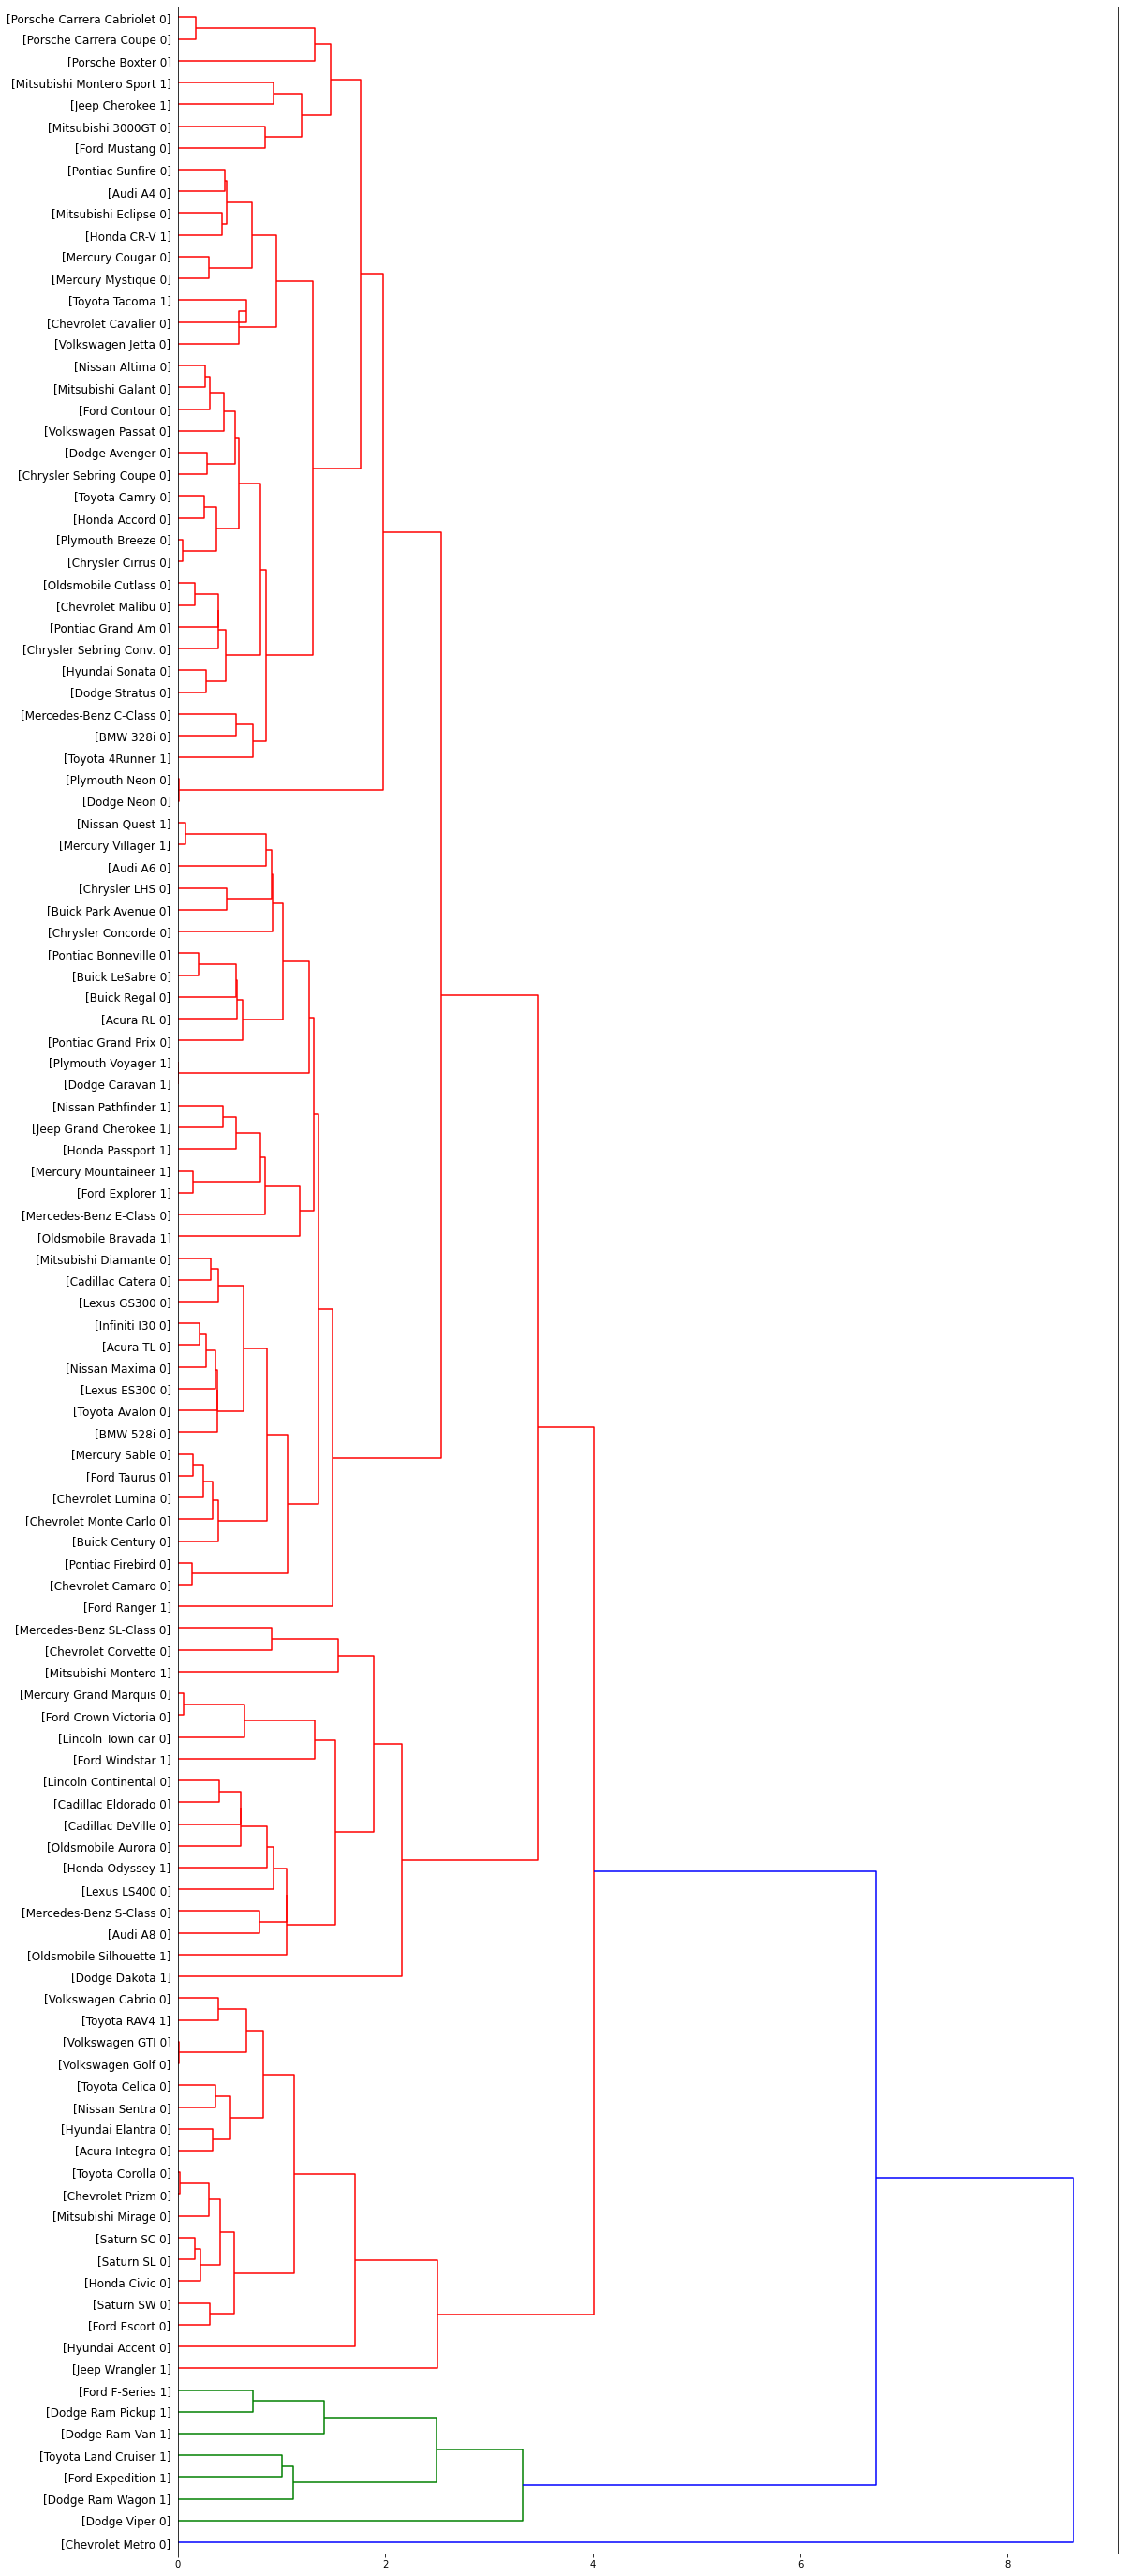

In [121]:
#plotting the dendrogram
fig = pylab.figure(figsize = (18, 50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], 
                           pdf['model'][id], 
                           int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z_cluster,  
                              leaf_label_func=llf, 
                              leaf_rotation=0, 
                              leaf_font_size =12, 
                              orientation = 'right')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

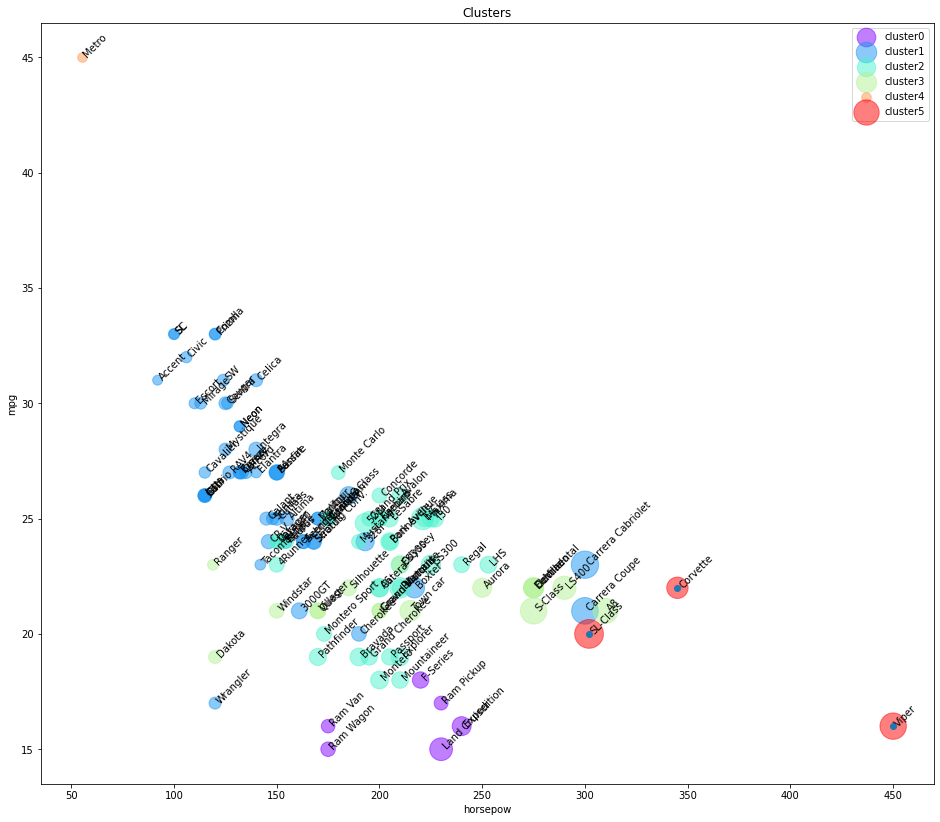

In [133]:
#clustering using sklearn
from scipy.spatial import distance
distance_2 = distance.cdist(feature_norm, feature_norm, 'euclidean')
distance_2

agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_norm)
agglom.labels_

"""And, we can add a new field to our dataframe to 
show the cluster of each row:

"""
pdf['cluster_'] = agglom.labels_
pdf.head()

import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], 
                     subset.mpg[i],
                     str(subset['model'][i]), rotation= 45) 
    plt.scatter(subset.horsepow, subset.mpg, 
                s= subset.price*10, c=color, 
                label='cluster'+str(label),alpha=0.5)
plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

"""As one can see, the distribution of each cluster 
using the scatter plot is displayed, but it is not very clear where is the 
centroid of each cluster. 

Moreover, there are 2 types of vehicles 
in our dataset, "truck" (value of 1 in the type column) and 
"car" (value of 1 in the type column). 

So, I use them to distinguish the classes, and summarize the cluster. 

First I count the number of cases in each group:

"""

pdf.groupby(['cluster_','type'])['cluster_'].count()

agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

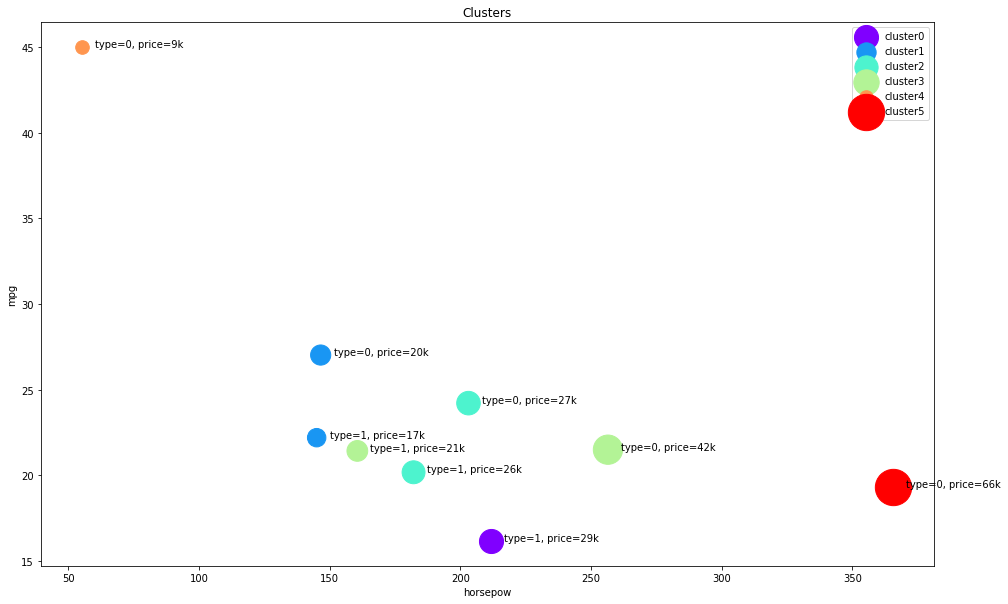

In [127]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

### **Notes** 

Now, we used the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. 

The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. 

The linkage criteria determines the metric used for the merge strategy:

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- Average linkage minimizes the average of the distances between all observations of pairs of clusters.


It is obvious that we have 3 main clusters with the majority of vehicles in those.

__Cars__:
- Cluster 1: with almost high mpg, and low in horsepower.
- Cluster 2: with good mpg and horsepower, but higher price than average.
- Cluster 3: with low mpg, high horsepower, highest price.
    
    
    
__Trucks__:
- Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
- Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
- Cluster 3: with good mpg and horsepower, low price.


Please notice that we did not use __type__ , and __price__ of cars in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite high accuracy.
